## Motivation

Consider a very deep image-classification neural network like the one below

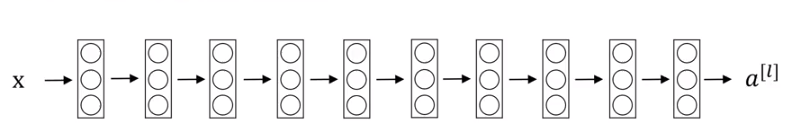

In [1]:
from IPython.display import Image

Image('images/very_deep_network.png')

A typical shortcoming of this sort of architecture is overfitting of the data.

This is a result of information gain from back-propagation not making it all the way back to our earlier layers in the network (due to the vanishing gradient problem). After a certain point, the earlier layers stop changing much at all, and the later layers over-adjust to the data it's trained on.

Residual Networks provide an approach to take us from error-over-train-time on the left to on the right.

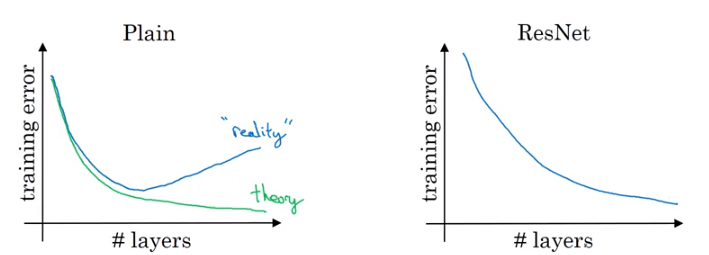

In [2]:
Image('images/resnet_error.png')

### Skip Connections

It does this by constructing "Shot Cut" or "Skip connections" like the ones below.

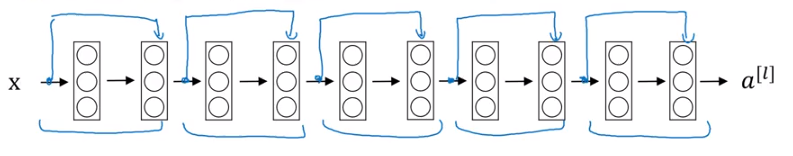

In [3]:
Image('images/very_deep_resnet.png')

In a typical network, we go from `a_L` to `a_L2` using the following.

$ a^{L} $

$ z^{L+1} = W^{L+1}a^{L} + b^{L+1} $

$ a^{L+1} = g(Z^{L+1}) $

$ z^{L+2} = W^{L+2}a^{L+1} + b^{L+2} $

$ a^{L+2} = g(Z^{L+2}) $

The key difference in a Residual Network is a revision of *the last step* to include a connection from a previous layer **before** application of the activation function.

$a^{L+2} = g(Z^{L+2} + a^{L})$

This allows us to both:

- Pass initial information deeper into the network
- Update our earlier weights more effectively

## Why this Works

The intuition of why this *helps* is a bit hard to unpack, but if you can convince yourself that you're, at the very least, able to have performance **as good** as a regular NN, then it makes enough sense that having more training parameters can only help improve the feature-richness of your model.

### Identity Function

If we go from `A` to `C` by passing through `B` and find that `A` and `C` are exactly the same, then we consider `B` to be the *identity function*

Similarly if we look at the final equal equation for `a_L2` above, we'll see that it's a function of `Z_L2` and `a_L`. However, if the model learns that the appropriate weights and biases for `Z_L1` are just `0`, then we're right back where we started with our value `a_L`.

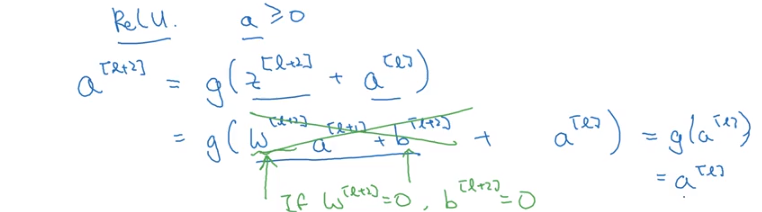

In [4]:
Image('images/resnet_intuition.png')

### Dimensionality

It's important to note that in order for this to work correctly, you must ensure that your shortcut calculations are operating over data of the exact same dimensions.

That's to say that in this example, we can do whatever convolution/intermediate calculations we want between `a_L` and `a_L2` as long as the dimension of the two are the same in the end.

## Different ResNet Blocks

### Identity Block

As we've stated before, the *skip connection can skip over arbitrarily-many* transformations, provided that the end result matches the dimensions of the layer we intend to use as a skip layer.

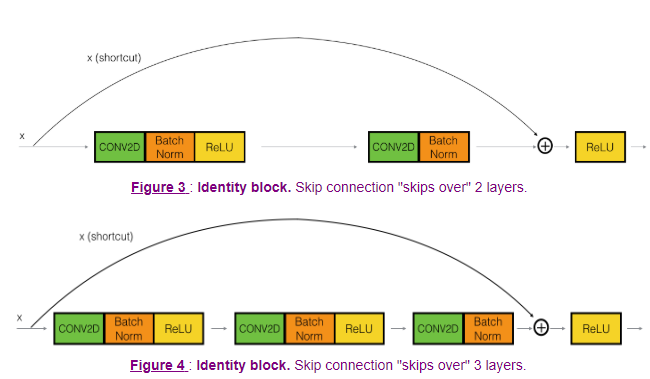

In [5]:
Image('images/resnet_arbitrary.png')

### Convolution Block

Similarly, we can construct *convolution blocks* that follow the same idea with the slight variation that our final layer should have the same dimensions as our input, with some convolution applied.

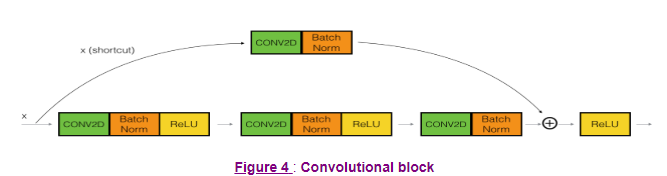

In [6]:
Image('images/conv_block.png')

### ResNet 50

Thus at scale, we can relatively-cheaply construct some robust networks.

Each intermediate stage opens with a Convolution Block that reduces the dimensionality from one stage to the next, then arbitrarily-many Identity Blocks to extract more complicated features.

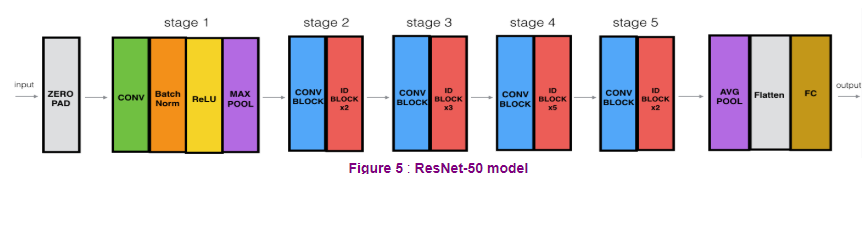

In [7]:
Image('images/resnet_50.png')